# Loading neuropixels data from Jaramillo lab

## Copy data to your workstation
You need three sets of data:
1. **Electrophysiology data**: spikes and events data.
1. **Behavior/stimulus data**: timing and parameters for each stimulus.
1. **Database of cells**: metadata about each recorded neuron.

## Install Python packages
1. You need to install the package [jaratoolbox](https://github.com/sjara/jaratoolbox) to read these datasets. If you want to run this inside a **virtual environment**, you need to create the environment before following the installation instructions in the README.txt.
2. Make sure your paths in `settings.py` point to the correct locations where data is stored.

# Load database of cells
The code below loads the database of cells (a pandas DataFrame) for mouse `feat007`.

In [75]:
import os
from jaratoolbox import settings
from jaratoolbox import celldatabase

subject = 'feat007'
studyName = '2022paspeech'
dbPath = os.path.join(settings.DATABASE_PATH, studyName, f'celldb_{subject}.h5')
celldb = celldatabase.load_hdf(dbPath)

In [76]:
celldb.iloc[0]

behavSuffix                                                  [a, b, a]
bestChannel                                                          0
brainArea                                                     AC_right
cluster                                                              0
cluster_label                                                     good
date                                                        2022-03-10
egroup                                                               0
ephysTime                               [11-19-31, 11-27-37, 11-44-02]
info                                     [anteromedial_DiI, soundLeft]
maxDepth                                                          2967
paradigm               [am_tuning_curve, am_tuning_curve, 2afc_speech]
pdepth                                                            2967
probe                                                        NPv1-8131
recordingSiteName                 Temporal association areas, layer 6a
record

In these recordings, there are three types of sessions: (1) AM sounds, (2) pure tones, and (3) speech sounds. 

In [77]:
celldb.sessionType[0]

['AM', 'pureTones', 'FTVOTBorders']

## Load data from one cell
Load the spike data from one cell.

In [78]:
from jaratoolbox import ephyscore

dbRow = celldb.iloc[9]  # Get metadata for the tenth cell in database

oneCell = ephyscore.Cell(dbRow)
ephysData, bdata = oneCell.load('AM') # Load data for session with AM sounds

**IMPORTANT:** Note that the number of stimulus presentations collected by the ephys system is usually one higher than the number of stimuli stored from the behavior system. This is because the behavior system only stores trials that fully completed (and the user usually stops the presentation half-way through a trial).

In [79]:
nTrialsBehavior = len(bdata['currentFreq'])
print(nTrialsBehavior)

221


In [80]:
nTrialsEphys = len(ephysData['events']['stimOn'])
print(nTrialsEphys)

222


In [83]:
from jaratoolbox import spikesanalysis

spikeTimes = ephysData['spikeTimes']
eventOnsetTimes = ephysData['events']['stimOn']
timeRange = [-0.5, 1]  # In seconds

(spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = \
    spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRange)

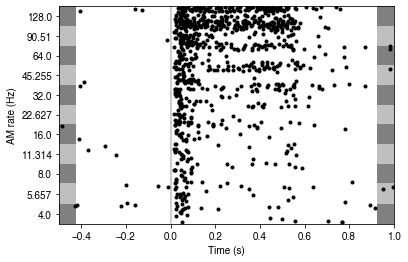

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from jaratoolbox import extraplots
from jaratoolbox import behavioranalysis

currentFreq = bdata['currentFreq']
possibleFreq = np.unique(currentFreq)
trialsEachCond = behavioranalysis.find_trials_each_type(currentFreq, possibleFreq)
pRaster, hcond, zline = extraplots.raster_plot(spikeTimesFromEventOnset, indexLimitsEachTrial, 
                                               timeRange, trialsEachCond, labels=possibleFreq)
plt.xlabel('Time (s)');
plt.ylabel('AM rate (Hz)');